# 학습 목표
* 딥러닝 모델의 크기를 조절해봅니다.
* 효과적인 딥러닝 모델 학습을 위한 규제를 해봅니다.

# 01 모델 크기 조절
* 레이어의 유닛수를 증가 또는 감소시켜 모델 전체 파라미터 수를 증가하거나 감소시킬 수 있다.
* 레이어의 수를 증가시켜 더 깊은 신경망을 만들어 모델의 크기를 증가시킬 수 있다.
* 데이터의 규모가 클수록 크고 깊은 모델에서 더 좋은 성능을 보여준다.
* 데이터에 비해 모델이 너무 크면 과대적합이 발생할 수 있다.
* 결론적으로 데이터의 규모에 따라 모델의 수를 적절하게 조절해야한다.

**모델의 크기 조절 방법에 따라 모델 성능의 결과가 어떻게 차이가 나는지 비교해보기**
### 데이터 로드 및 전처리

* 먼저 모델의 학습에 사용하기 위해 원-핫 인코딩(one-hot encoding)을 위한 함수를 정의
* imdb.load_data()를 통해 IMDB 데이터를 다운로드한 뒤, 10000 차원의 학습 데이터로 원-핫 인코딩을 수행

In [1]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 구성 및 컴파일
* IMDB 데이터셋에 대해 분류하는 모델로서 기존에 정의했던 3개의 Dense 레이어를 가지는 딥러닝 모델을 정의
* rmsprop 옵티마이저, binary_crossentropy 손실 함수, accuracy 지표를 사용하도록 컴파일
* summary()를 통해 확인해보면, 모델의 전체 파라미터의 수가 1,296,769개인 것을 알 수 있다.

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,296,769 (4.95 MB)

 Trainable params: 1,296,769 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습
* 딥러닝 모델을 fit()을 이용해 학습

In [3]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - accuracy: 0.6959 - loss: 0.5535 - val_accuracy: 0.8357 - val_loss: 0.3822
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8921 - loss: 0.2721 - val_accuracy: 0.8882 - val_loss: 0.2734
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9182 - loss: 0.2098 - val_accuracy: 0.8604 - val_loss: 0.3354
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9345 - loss: 0.1721 - val_accuracy: 0.8846 - val_loss: 0.2897
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9486 - loss: 0.1379 - val_accuracy: 0.8802 - val_loss: 0.3097
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9658 - loss: 0.1008 - val_accuracy: 0.8526 - val_loss: 0.4170
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9609 - loss: 0.1014 - val_accuracy: 0.8766 - val_loss: 0.3699
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9826 - loss: 0.0564 - val_accuracy: 0.8777 -

* 모델의 지표 결과로 loss, val_loss, accuracy, val_accuracy를 차트로 살펴보기

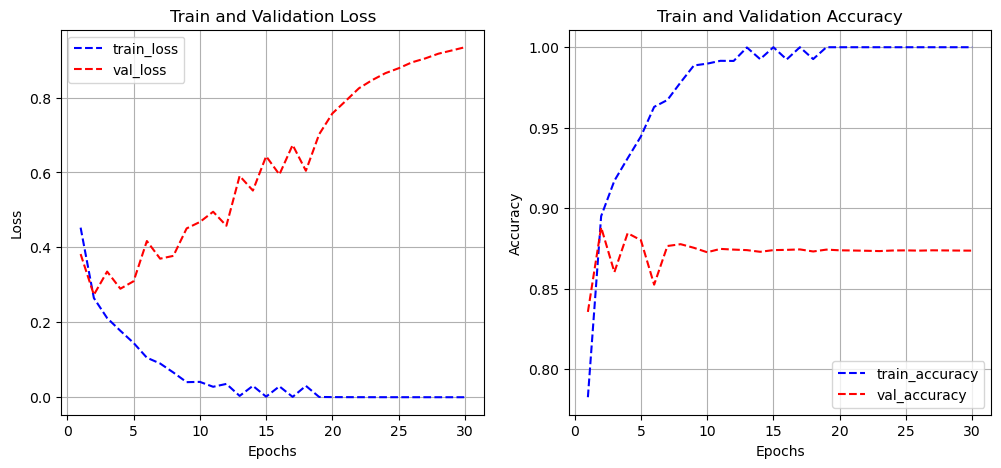

In [5]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 결과를 보면, 딥러닝 모델이 과대적합된 상태인 것을 알 수 있다.
* 따라서 과대적합을 해결하기 위한 방법을 찾아야합니다.

### 모델 크기 증가
* 먼저 모델의 크기를 증가시키면 어떻게 될지 살펴 보기
* Dense 레이어의 유닛수를 128에서 2048로 크게 증가시켜서 모델의 전체 파라미터 수가 24,680,449개가 된것을 확인할 수 있다.

In [4]:
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input3 (Dense)                  │ (None, 2048)           │    20,482,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,680,449 (94.15 MB)

 Trainable params: 24,680,449 (94.15 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 809ms/step - accuracy: 0.6239 - loss: 0.7016 - val_accuracy: 0.8682 - val_loss: 0.3399
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 591ms/step - accuracy: 0.8874 - loss: 0.2885 - val_accuracy: 0.8783 - val_loss: 0.2900
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 589ms/step - accuracy: 0.9189 - loss: 0.2046 - val_accuracy: 0.8418 - val_loss: 0.3812
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 571ms/step - accuracy: 0.9412 - loss: 0.1585 - val_accuracy: 0.8885 - val_loss: 0.2851
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9602 - loss: 0.1108 - val_accuracy: 0.8823 - val_loss: 0.3293
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 567ms/step - accuracy: 0.9741 - loss: 0.0800 - val_accuracy: 0.8853 - val_loss: 0.3333
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 562ms/step - accuracy: 0.9881 - loss: 0.0449 - val_accuracy: 0.8832 - val_loss: 0.3945
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9915 - loss: 0.0332 - val_accu

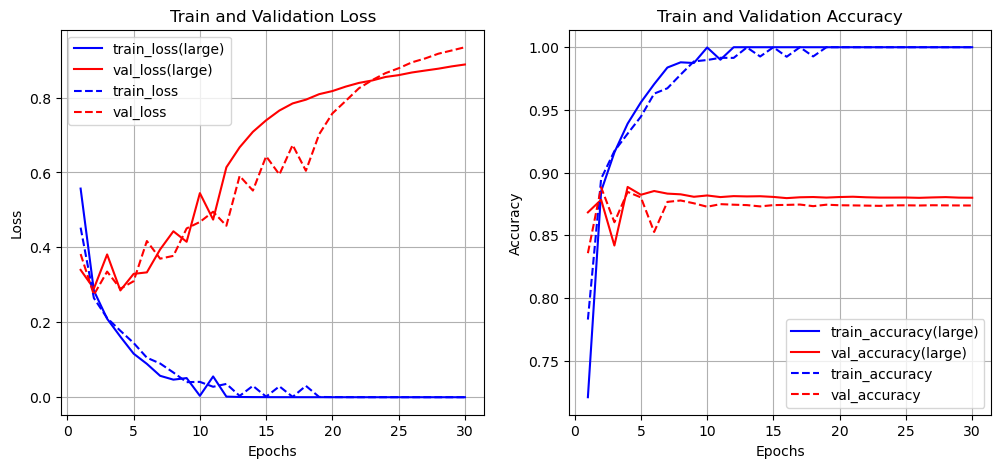

In [7]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 모델의 크기가 클수록 즉 파라미터 수가 많은 신경망일수록 빠르게 훈련 데이터 모델링이 가능하고 학습 손실이 낮아지는 것을 알 수 있습니다.     
그러나 모델이 과대적합에는 더욱 민감해지는 것을 학습-검증 데이터 손실을 통해 확인이 가능합니다.

### 모델 크기 감소
* 이제 모델에서 사용한 Dense 레이어의 유닛수를 128대신 16으로 줄여서 사용 해보기
* 모델의 크기를 줄여서 전체 파라미터의 수가 160,305개로 줄어들게 됩니다.

In [8]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2')) # 16으로 설정
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input2 (Dense)                  │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 305ms/step - accuracy: 0.7366 - loss: 0.5652 - val_accuracy: 0.8805 - val_loss: 0.3520
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9048 - loss: 0.2909 - val_accuracy: 0.8901 - val_loss: 0.2870
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9226 - loss: 0.2207 - val_accuracy: 0.8853 - val_loss: 0.2857
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9391 - loss: 0.1777 - val_accuracy: 0.8862 - val_loss: 0.2843
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9478 - loss: 0.1574 - val_accuracy: 0.8790 - val_loss: 0.3055
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9503 - loss: 0.1388 - val_accuracy: 0.8794 - val_loss: 0.3104
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9619 - loss: 0.1220 - val_accuracy: 0.8765 - val_loss: 0.3296
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9652 - loss: 0.1087 - val_accuracy: 0.8727 -

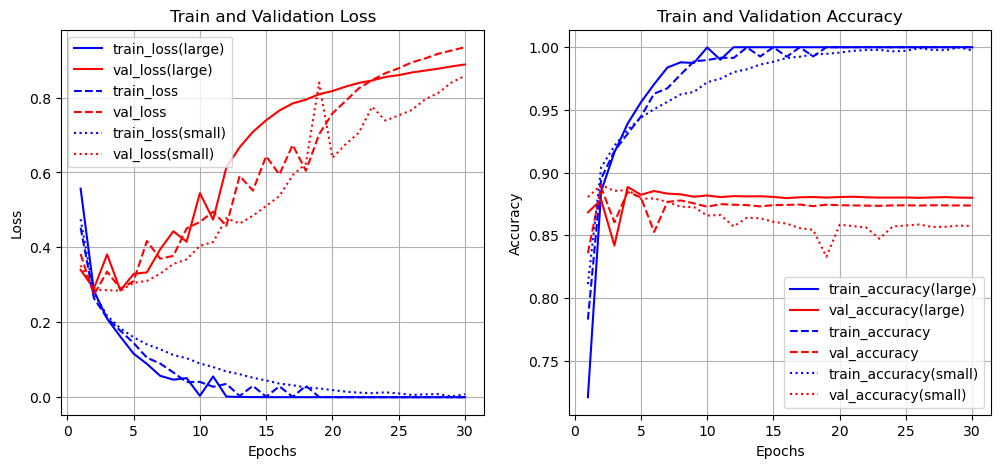

In [10]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 크기를 줄였더니 과대적합 문제에 조금 덜 민감한 것을 알 수 있습니다.     
즉, 모델의 최적화를 위해서는 **파라미터 수를 적절하게 조절 해야 된다는 것**을 알 수 있습니다.    
     
그렇다면 어느정도 파라미터가 적절할까요? 아래 코드를 이용해 여러분이 조절해보시기 바랍니다.    
     
단, 그래프는 다른 그래프의 데이터와 구분을 위해 파랑-빨강이 아닌 초록색으로 변경했습니다.     
초록색 실선이 train 데이터이며 초록색 점선이 validation 데이터입니다.

### 직접 설정해보기

In [11]:
# [play ground]
# 원하는 분은 Dense층을 늘리거나 줄이는 등 모델의 구조 역시 변경해보시기 바랍니다.

your_model = models.Sequential()
your_model.add(layers.Dense(25, activation='relu', input_shape=(10000, ), name='input2'))  #조절해보기
your_model.add(layers.Dense(25, activation='relu', name='hidden2'))                        #조절해보기
your_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
your_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
your_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input2 (Dense)                  │ (None, 25)             │       250,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,701 (979.30 KB)

 Trainable params: 250,701 (979.30 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
your_model_history = your_model.fit(x_train, 
                                    y_train, 
                                    epochs=15,     # 조절해보기
                                    batch_size=512,  
                                    validation_data=(x_test, y_test))

Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 292ms/step - accuracy: 0.7369 - loss: 0.5426 - val_accuracy: 0.8753 - val_loss: 0.3293
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9018 - loss: 0.2700 - val_accuracy: 0.8705 - val_loss: 0.3150
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9208 - loss: 0.2130 - val_accuracy: 0.8887 - val_loss: 0.2790
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9383 - loss: 0.1722 - val_accuracy: 0.8806 - val_loss: 0.2994
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9461 - loss: 0.1550 - val_accuracy: 0.8712 - val_loss: 0.3343
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9538 - loss: 0.1362 - val_accuracy: 0.8771 - val_loss: 0.3239
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9591 - loss: 0.1202 - val_accuracy: 0.8613 - val_loss: 0.3929
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9597 - loss: 0.1159 - val_accuracy: 0.8738 -

ValueError: x and y must have same first dimension, but have shapes (15,) and (30,)

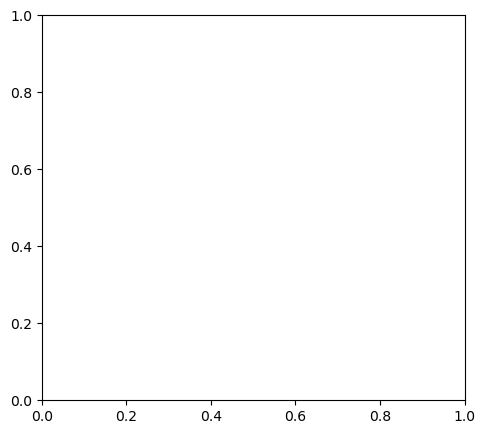

In [13]:
your_history_dict = your_model_history.history

your_loss = your_history_dict['loss']
your_val_loss = your_history_dict['val_loss']
epochs = range(1, len(your_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, your_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, your_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

your_accuracy = your_history_dict['accuracy']
your_val_accuracy = your_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.plot(epochs, your_accuracy, 'g-', label='train_accuracy(your)')
ax2.plot(epochs, your_val_accuracy, 'g--', label='val_accuracy(your)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 02 규제

* 모델의 과대적합을 방지하는 방법 중에 하나로 규제가 있다.
* 가중치의 파라미터 값이 커서 과대적합이 발생하는 경우가 많기 때문에 이를 방지하기 위해 큰 가중치 값은 큰 규제를 가하는 방법이 규제화이다.
* 규제를 통해 가중치의 절댓값을 가능한 작게 만들어서 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것을 의미
* 즉, 기울기를 작게 만드는 과정
* 규제를 통해서 가중치의 분포가 더 균일하게 되고, 복잡한 네트워크일수록 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 한다.
* 규제가 모델이 과대적합 되지 않도록 강제로 제한하는 역할을 하므로 적절한 규제값을 찾는 것이 중요하다
* 모델의 손실함수에서 큰 가중치에 비용을 추가하는 형태로 규제를 적용할 수 있으며 대표적인 방법으로 L1 규제와 L2 규제가 있다.
* L1 규제는 가중치의 절댓값에 비례하는 비용이 추가되고, L2 규제는 가중치 감쇠(weight decay)라고도 불리며,     
  가중치의 제곱에 비례하는 비용이 추가됩니다. 또한, **L1과 L2를 둘다 합쳐서 사용하는 경우도 존재**

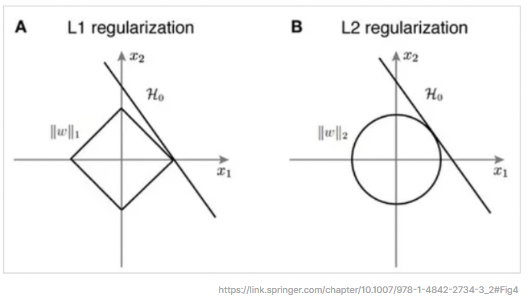

## L1 규제 (L1 Regularization)

- L1 규제는 가중치의 절댓값 합에 비례하는 비용을 손실 함수에 추가하는 방법
- 가중치의 절댓값은 L1 노름(norm)이라고 하며 다음과 같이 표현  $$  ||w||_1 = \sum_{i=1}^{n} |w_i|  $$
- 기존의 손실 함수 \( L \)에서 \( \alpha \)를 곱한 L1 규제를 적용하여 계산  $$  \frac{1}{n} \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \alpha \sum_{j=1}^{m} |w_j|$$
- $ \alpha $ 값을 이용하여 사용자가 하이퍼파라미터처럼 규제의 조절이 가능  
- $ \alpha $ 값을 증가시키면 규제가 강화되어 가중치 절댓값의 합을 줄이도록 학습하여  
  가중치가 0인 중요하지 않은 변수를 제외되어 일반화에 적합
- $ \alpha $ 값을 감소시키면 규제가 약해져서 가중치 값이 증가하고 과대적합이 발생할 수 있음

### L1 규제 적용하기
1. 케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1으로 지정해주면 됩니다.
2. 물론 레이어에 bias_regularizer와 activity_regularizer에도 적용할 수 있습니다.
3. 케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 가중치 정규화인 kernel_regularizer를 l1으로 지정해주면 됩니다.
4. 물론 레이어에 편향 정규화인 bias_regularizer와 출력값 정규화인 activity_regularizer에도 적용할 수 있습니다.

In [14]:
l1_model =  models.Sequential()

l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu',
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

l1_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 402ms/step - accuracy: 0.5610 - loss: 7.1248 - val_accuracy: 0.5474 - val_loss: 1.9002
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6488 - loss: 1.8574 - val_accuracy: 0.6138 - val_loss: 1.7744
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6993 - loss: 1.7518 - val_accuracy: 0.6604 - val_loss: 1.6961
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7167 - loss: 1.6675 - val_accuracy: 0.7293 - val_loss: 1.6080
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7264 - loss: 1.5978 - val_accuracy: 0.7580 - val_loss: 1.5542
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7591 - loss: 1.5322 - val_accuracy: 0.7744 - val_loss: 1.4880
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7800 - loss: 1.4787 - val_accuracy: 0.7873 - val_loss: 1.4506
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7953 - loss: 1.4375 - val_accuracy: 0.7981 -

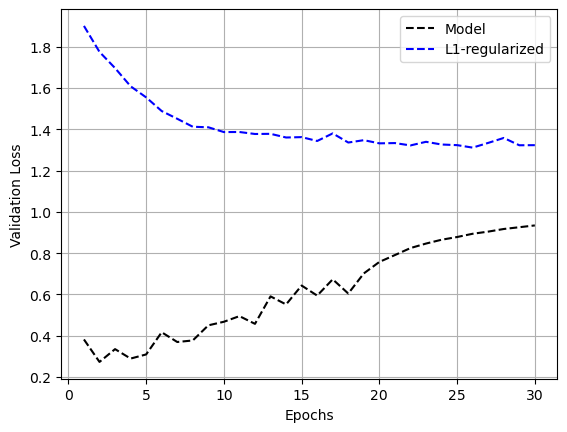

In [16]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

기존 모델의 결과와 L1 규제를 사용한 결과를 비교해보면, 기존 모델은 Loss 값이 점점 증가하며 과대적합의 모습을 보이는 반면,     
L1 규제 결과는 안정적으로 Loss 값이 감소되는 것을 알 수 있습니다.

---

## L2 규제 (L2 Regularization)

* L2 규제는 가중치 감쇠(weight decay)라고도 불리며, 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값에 더하는 방법
* 가중치의 제곱은 L2 노름(norm)이라고 하며 다음과 같이 표현 $$  ||w||_2 = \sqrt{\sum_{i=1}^{n} w_i^2}  $$  
* 기존의 손실 함수 \( L \)에서 \( \lambda \)를 곱한 L2 규제를 적용하여 계산 $$  \frac{1}{n} \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \lambda \sum_{j=1}^{m} w_j^2  $$ 
* L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값을 더하여 과대적합을 방지
* \( \lambda \) 값이 크면 가중치 감소가 커지고, 작으면 가하는 규제가 적어지게 됨
* L2 규제는 L1보다 더 Robust한 모델을 생성하므로 많이 사용되는 방법 중 하나


### L2 적용하기
케라스에서 L2 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l2로 지정해주면 됩니다.

In [17]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu',
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.7137 - loss: 0.9110 - val_accuracy: 0.8483 - val_loss: 0.6121
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8819 - loss: 0.5614 - val_accuracy: 0.8582 - val_loss: 0.5463
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8872 - loss: 0.4976 - val_accuracy: 0.8713 - val_loss: 0.5003
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8910 - loss: 0.4609 - val_accuracy: 0.8781 - val_loss: 0.4729
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8974 - loss: 0.4365 - val_accuracy: 0.8612 - val_loss: 0.4864
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8969 - loss: 0.4220 - val_accuracy: 0.8826 - val_loss: 0.4425
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8983 - loss: 0.4117 - val_accuracy: 0.8557 - val_loss: 0.4784
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8976 - loss: 0.4086 - val_accuracy: 0.8828 -

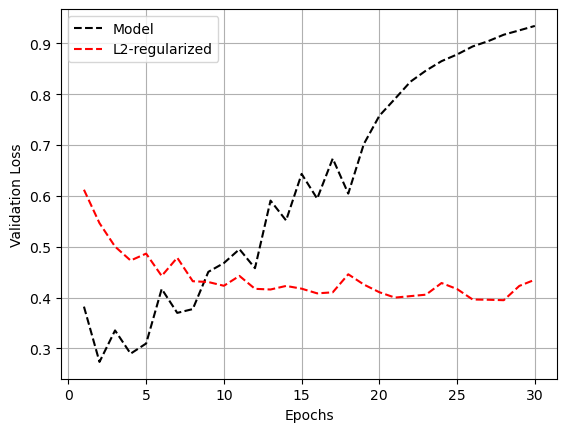

In [19]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

## L1 L2 규제 
L1과 L2 규제를 같이 적용하는 방법도 존재하는데, 케라스에서 L1과 L2 규제를 같이 사용하기 위해서는     
적용할 레이어에서 kernel_regularizer를 l1_l2로 지정해주면 됩니다.

In [20]:
## 업데이트 되면서 아래처럼 진행해주셔야합니다


# l1_l2_model = models.Sequential()
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu', input_shape=(10000, )))
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu'))
# l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
# l1_l2_model.compile(optimizer='rmsprop',
#                     loss='binary_crossentropy',
#                     metrics=['accuracy'])
# l1_l2_model.summary()


from tensorflow.keras import models, layers, regularizers

l1_l2_model = models.Sequential()

l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                             activation='relu',
                             input_shape=(10000,)))
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))

l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

l1_l2_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.6875 - loss: 1.4173 - val_accuracy: 0.8164 - val_loss: 0.7035
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8296 - loss: 0.6747 - val_accuracy: 0.8096 - val_loss: 0.6754
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8425 - loss: 0.6237 - val_accuracy: 0.8563 - val_loss: 0.5933
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8533 - loss: 0.5943 - val_accuracy: 0.8576 - val_loss: 0.5777
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8603 - loss: 0.5736 - val_accuracy: 0.8237 - val_loss: 0.6284
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8585 - loss: 0.5702 - val_accuracy: 0.8612 - val_loss: 0.5574
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8583 - loss: 0.5614 - val_accuracy: 0.8632 - val_loss: 0.5526
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8613 - loss: 0.5546 - val_accuracy: 0.8590 -

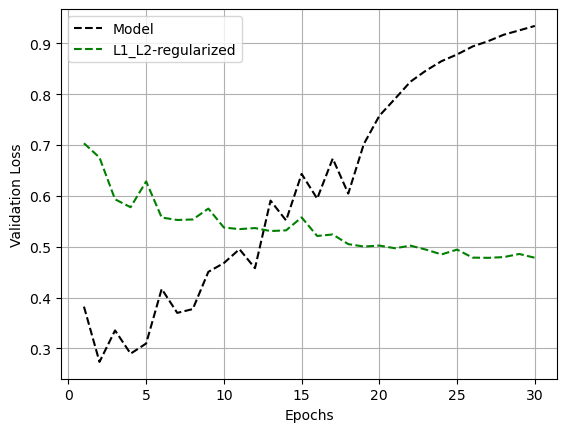

In [22]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L1 L2 규제를 함께 사용하는 경우는 L1 규제와 큰 차이가 없는 것을 알 수 있습니다.

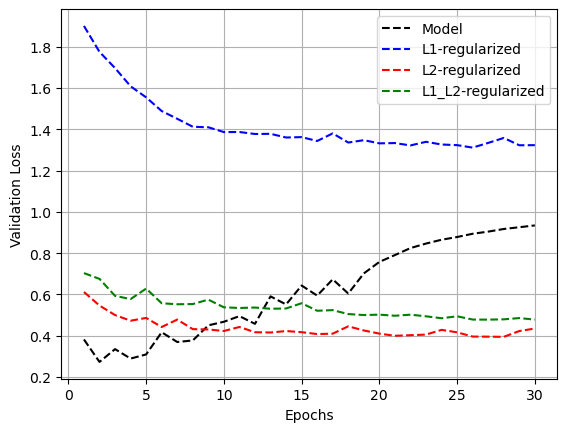

In [23]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

전체 규제 방법들을 다 비교해보면, L2 규제가 가장 좋은 결과를 보여주고 있습니다.     
물론 어떤 모델에 어떤 규제 방법이 좋을지는 실험을 통해 찾아가는 과정이 필요합니다.    
    
위에서 다양한 종류의 규제를 사용해 보았지만 영상에서도 언급했듯이 큰 규제 값을 줄 수도 있고 작은 규제 값을 줄 수도 있습니다.     
위에서 실험한 결과 가장 좋아 보인 L2 규제라도 어떤 규제 값을 주느냐에 따라 결과가 달라질 것입니다.     
이 부분은 여러분이 kernel_regularizaer 부분을 직접 변경해가며 찾아보시죠. 여러분의 val_loss는 노란색으로 표시했습니다.

In [30]:
# [play ground]
# L2 규제의 기본 값은 0.01입니다. 여러분이 원하는 크기로 조절해보세요. 혹은 다른 규제를 사용하셔도 됩니다.

your_model = models.Sequential()
your_model.add(layers.Dense(20, kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.005)))
your_model.add(layers.Dense(20, kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.005)))
your_model.add(layers.Dense(1, activation='sigmoid'))

your_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

your_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
your_model_hist = your_model.fit(x_train, y_train,
                                 epochs=30,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 313ms/step - accuracy: 0.8559 - loss: 1.5113 - val_accuracy: 0.8537 - val_loss: 1.5070
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8582 - loss: 1.5070 - val_accuracy: 0.8523 - val_loss: 1.5135
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8541 - loss: 1.5091 - val_accuracy: 0.8343 - val_loss: 1.5410
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8585 - loss: 1.5060 - val_accuracy: 0.8461 - val_loss: 1.5233
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8554 - loss: 1.5025 - val_accuracy: 0.8536 - val_loss: 1.5087
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8555 - loss: 1.5022 - val_accuracy: 0.8580 - val_loss: 1.4990
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8587 - loss: 1.4958 - val_accuracy: 0.8562 - val_loss: 1.5007
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8602 - loss: 1.4976 - val_accuracy: 0.8460 -

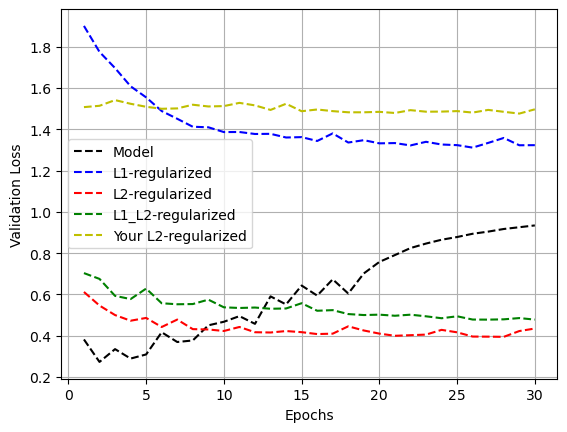

In [34]:
your_val_loss = your_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.plot(epochs, your_val_loss, 'y--', label='Your L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# 03 드롭아웃 (Dropout)

* 딥러닝 모델의 과대적합을 방지하기 위한 규제 기법 중 하나로 자주 사용되는 드롭아웃이다.
* 다른 규제 기법과 달리 드롭아웃은 개념도 쉽고 효과적이며 사용하기도 간편하여 가장 널리 사용되는 방법
* 드롭아웃은 **모델이 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용** 하는 방법
* 신경망에 드롭아웃을 적용하면, 학습이 진행되는 동안 무작위로 층(레이어)의 일부 특성(노드)를 제외하는 형태로 동작
* 일반적으로는 20% ~ 50% 사이의 비율로 지정되어 드롭아웃을 사용
* 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않고, 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여주게 된다.
 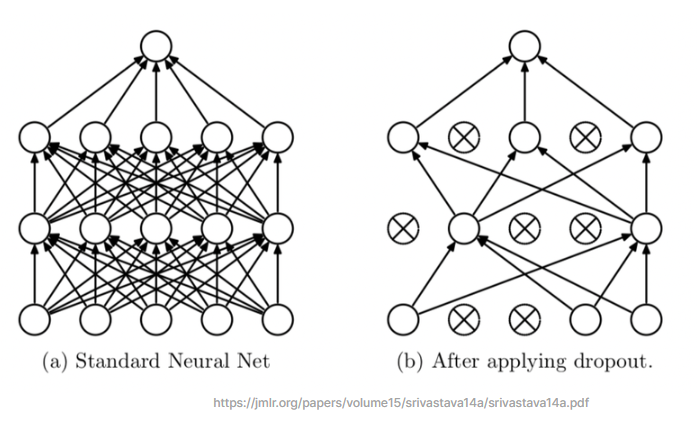

## 드롭아웃 (20%)
드롭아웃이 포함된 딥러닝 모델을 정의하기 위해 기존 모델에서 사용한 구조에서 적절한 위치에 드롭아웃 레이어를 추가해야 합니다.     
먼저 첫번째 레이어와 두번째 레이어 사이에 Dropout 레이어를 추가하는데, 20% 정도만 적용하기 위해서 0.2로 지정해줍니다.     
마찬가지로 기존 두번째 레이어와 세번째 레이어 사이에 20%로 적용한 Dropout 레이어를 추가합니다.

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#기존 모델과 어떤 차이가 나는지 비교하기 위해 학습 히스토리를 별도로 저장합니다.
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 431ms/step - accuracy: 0.6960 - loss: 0.5882 - val_accuracy: 0.8726 - val_loss: 0.3676
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8786 - loss: 0.3435 - val_accuracy: 0.8874 - val_loss: 0.2900
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9084 - loss: 0.2580 - val_accuracy: 0.8830 - val_loss: 0.2911
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9265 - loss: 0.2118 - val_accuracy: 0.8873 - val_loss: 0.2793
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9392 - loss: 0.1791 - val_accuracy: 0.8862 - val_loss: 0.2897
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9519 - loss: 0.1478 - val_accuracy: 0.8839 - val_loss: 0.3034
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9597 - loss: 0.1262 - val_accuracy: 0.8766 - val_loss: 0.3313
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9653 - loss: 0.1074 - val_accuracy: 0.8735 -

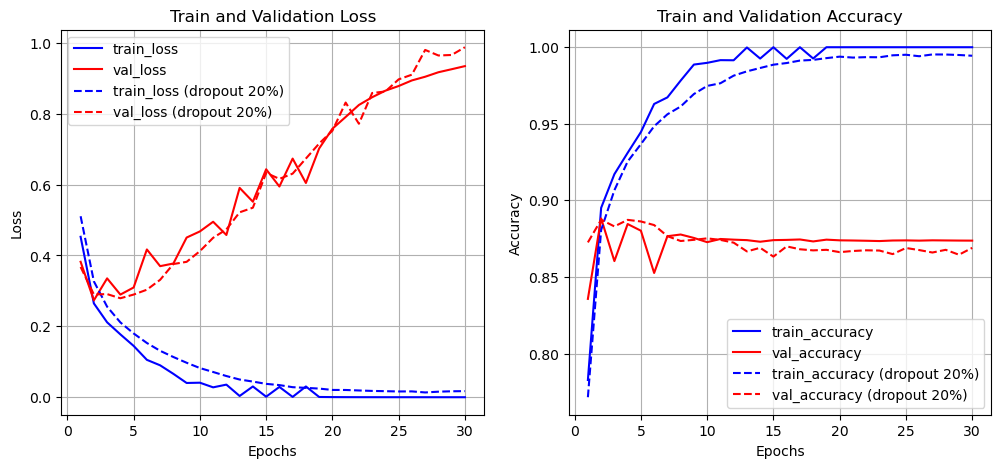

In [37]:
#기존 모델의 히스토리 결과와 드롭아웃을 20% 적용한 히스토리 결과를 각각 비교하기 위해 차트로 시각화합니다.
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

차트를 보면 기존 모델과 비교하여 드롭아웃을 적용한 모델이 과대적합 정도가 감소한 것을 알 수 있습니다.

## 드롭아웃 (50%)
기존 모델보다 드롭아웃 비중을 50%로 증가시키기 위해 Dropout 레이어에서 0.2로 지정된 값을 0.5로 증가시켜 줍니다.

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 마찬가지로 모델별로 비교를 위해서 학습 히스토리를 별도로 저장합니다.
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step - accuracy: 0.6087 - loss: 0.6508 - val_accuracy: 0.8598 - val_loss: 0.4815
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7884 - loss: 0.4917 - val_accuracy: 0.8780 - val_loss: 0.3558
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8444 - loss: 0.3875 - val_accuracy: 0.8856 - val_loss: 0.2993
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8773 - loss: 0.3368 - val_accuracy: 0.8880 - val_loss: 0.2810
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9017 - loss: 0.2852 - val_accuracy: 0.8897 - val_loss: 0.2772
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9163 - loss: 0.2479 - val_accuracy: 0.8855 - val_loss: 0.2852
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9268 - loss: 0.2223 - val_accuracy: 0.8880 - val_loss: 0.2891
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9340 - loss: 0.2004 - val_accuracy: 0.8867 -

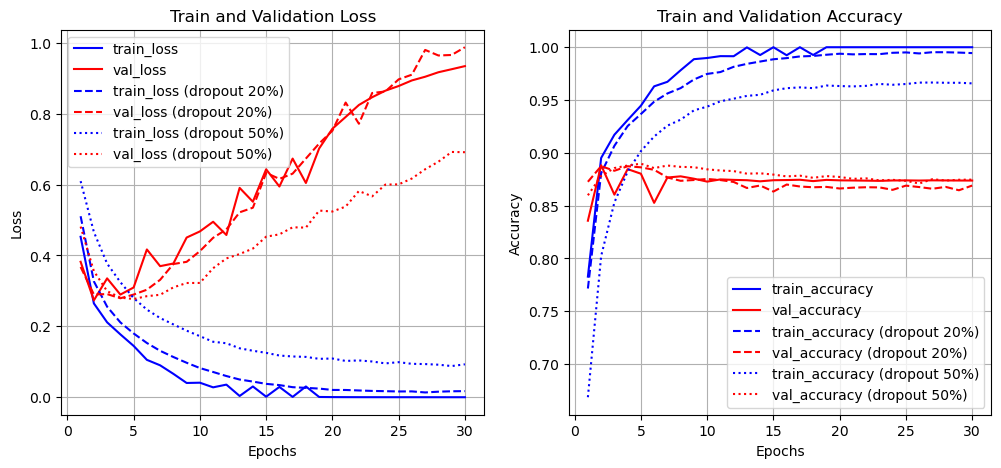

In [40]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 최종 학습 정리
과대적합을 막기 위해 모델 크기 조절, 규제 적용, 드롭아웃을 적용해 보았다.    
모델 크기는 데이터에 비해 모델이 너무 크면 과대적합이 발생할 수있기 때문에 규모에 따라 조절해주는 과정이였다.    
먼저 모델 크기를 증가/감소를 시켜보고 직접 설정까지 해보았고 Dense와 epochs를 이용해 조절하였다.    
다음으로는 규제를 적용해 보았는데 L1, L2, L1_L2의 조합을 적용해보았다.    
규제는 과대적합이 발생하는 경우를 방지하기 위해 큰 가중치 값은 큰 규제를 가하는 방법이 규제화이다.    
마지막으로 드롭아웃을 적용해 보았는데 모델이 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용하는 방법이였다.    
이번 학습에서는 20%적용과 50%를 적용해 학습을 해 보았다.    
50% 적용의 경우 과대적합을 잘 잡는듯 했지만 훈련도 잘 안되는것을 볼 수 있었다.